In [88]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [190]:
filename = r'C:\Users\Asus\SWSS Boulder 2022\Space-Weather-Simulation-Summer-School\day_2\sme_2013.txt'
file = open(filename)
rows = file.readlines()
names = rows[104]
nameslist = names.split("\t")
dataset = np.genfromtxt(filename, skip_header=105)
file.close()

In [191]:
dataset

array([[ 2.013e+03,  1.000e+00,  1.000e+00, ...,  2.700e+01, -1.200e+01,
         1.500e+01],
       [ 2.013e+03,  1.000e+00,  1.000e+00, ...,  2.900e+01, -1.300e+01,
         1.600e+01],
       [ 2.013e+03,  1.000e+00,  1.000e+00, ...,  2.600e+01, -1.000e+01,
         1.600e+01],
       ...,
       [ 2.013e+03,  1.200e+01,  3.100e+01, ...,  9.800e+01, -2.800e+01,
         7.000e+01],
       [ 2.013e+03,  1.200e+01,  3.100e+01, ...,  9.900e+01, -2.900e+01,
         7.000e+01],
       [ 2.013e+03,  1.200e+01,  3.100e+01, ...,  1.170e+02, -4.700e+01,
         7.000e+01]])

In [192]:
nameslist

['<year>',
 '<month>',
 '<day>',
 '<hour>',
 '<min>',
 '<sec>',
 '<SME (nT)>',
 '<SML (nT)>',
 '<SMU (nT)>\n']

In [193]:
dataset

array([[ 2.013e+03,  1.000e+00,  1.000e+00, ...,  2.700e+01, -1.200e+01,
         1.500e+01],
       [ 2.013e+03,  1.000e+00,  1.000e+00, ...,  2.900e+01, -1.300e+01,
         1.600e+01],
       [ 2.013e+03,  1.000e+00,  1.000e+00, ...,  2.600e+01, -1.000e+01,
         1.600e+01],
       ...,
       [ 2.013e+03,  1.200e+01,  3.100e+01, ...,  9.800e+01, -2.800e+01,
         7.000e+01],
       [ 2.013e+03,  1.200e+01,  3.100e+01, ...,  9.900e+01, -2.900e+01,
         7.000e+01],
       [ 2.013e+03,  1.200e+01,  3.100e+01, ...,  1.170e+02, -4.700e+01,
         7.000e+01]])

In [199]:
TIME = []

year = []
month = []
day = []
hour = []
minute = []
seconds = []

for times in range(len(dataset[:,0])):
    year.append(int(dataset[times,0]))
    month.append(int(dataset[times,1]))
    day.append(int(dataset[times,2]))
    hour.append(int(dataset[times,3]))
    minute.append(int(dataset[times,4]))
    seconds.append(int(dataset[times,5]))

    #create datetime
    time0 = dt.datetime(year[times], month[times], day[times], hour[times], minute[times], seconds[times])
    TIME.append(time0)
    
SME = {nameslist[6]: dataset[:,6]}
SML = {nameslist[7]: dataset[:,7]}
SMU = {nameslist[8]: dataset[:,8]}

In [41]:
#Lets sort out the first week
def timeindex(array, start, stop):
    indstart = 0
    indstop = 0
    for ind in range(len(array)):
        if array[ind]==start:
            indstart=ind
        elif array[ind]==stop:
            indstop=ind

    return indstart, indstop

In [195]:
start, stop = timeindex(TIME, dt.datetime(2013, 1, 1, 0, 0), dt.datetime(2013, 1, 8, 0, 0))

In [46]:
start

0

In [58]:
stop

10080

In [200]:
SMLarr = np.array(SML)
SMLarr

array({'<SML (nT)>': array([-12., -13., -10., ..., -28., -29., -47.])},
      dtype=object)

In [251]:
#Find the storm onset times
def Substorm_Onset(data):
    Onset_Index = [data[ind+1]-data[ind] < -15
                   and data[ind+2] - data[ind] < -30 
                   and data[ind+3]-data[ind] < -45 
                   and np.sum(data[ind+4:ind+30])/26-data[ind] < -100
                   for ind in range(len(data)-31)]
    
    return Onset_Index

In [239]:
Onset_TIME = Substorm_Onset(dataset[:,7])

In [240]:
indexlist = np.where(Onset_TIME)
indexlist

(array([  6099,   6100,  10383, ..., 521924, 521925, 524665], dtype=int64),)

In [241]:
np.shape(indexlist)

(1, 1744)

In [243]:
indexlist = np.array(indexlist)

In [244]:
indexlist = indexlist.squeeze()

In [231]:
def Index_Sieve(indlist):
    new_indlist = [indlist[ind+1]-indlist[ind]>=30 for ind in range(len(indlist)-1)]
    return new_indlist

In [ ]:
def Index_Sieve(indlist):
    for ind in range(len(indlist)):
        
    return new_indlist

In [245]:
new_indexlist = Index_Sieve(indexlist)
new_indexlist

[False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False

In [246]:
Sieved_Onset_Time = np.where(new_indexlist)
Sieved_Onset_Time

(array([   1,    2,    3,    5,    7,    9,   10,   11,   12,   15,   16,
          20,   21,   23,   26,   28,   29,   30,   33,   34,   35,   38,
          39,   47,   48,   49,   51,   56,   57,   59,   60,   67,   74,
          76,   80,   84,   85,   87,   91,   92,   93,   98,   99,  106,
         107,  110,  112,  113,  117,  121,  122,  126,  127,  129,  134,
         135,  139,  140,  145,  146,  149,  151,  155,  157,  158,  165,
         166,  169,  170,  176,  177,  180,  183,  184,  186,  188,  189,
         196,  201,  203,  205,  206,  207,  208,  209,  211,  216,  219,
         233,  234,  242,  246,  253,  258,  259,  263,  266,  270,  272,
         273,  276,  277,  278,  279,  281,  283,  284,  285,  286,  288,
         289,  290,  292,  294,  297,  300,  301,  303,  305,  318,  322,
         323,  334,  344,  358,  360,  363,  364,  367,  369,  375,  377,
         378,  379,  380,  383,  384,  392,  395,  398,  399,  402,  403,
         404,  407,  409,  410,  412, 

In [247]:
new_indexlist = np.where(indexlist)
new_indexlist

(array([   0,    1,    2, ..., 1741, 1742, 1743], dtype=int64),)

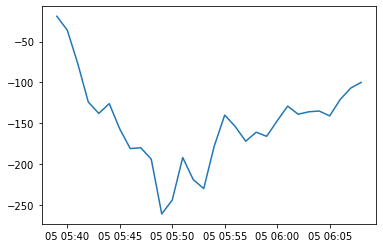

In [130]:
plt.plot(TIME[6099:6129], dataset['SML_nT'][6099:6129])

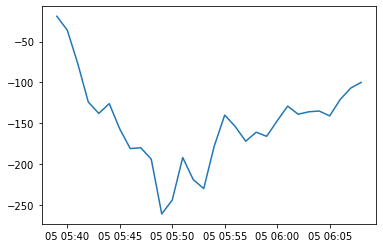

In [180]:
plt.plot(TIME[indexlist[0]:indexlist[0]+30], dataset['SML_nT'][indexlist[0]:indexlist[0]+30])

In [100]:
TIMEnp = np.array(TIME)

In [104]:
TIME[6099]

datetime.datetime(2013, 1, 5, 5, 39)

In [248]:
Substorm_list = TIMEnp[indexlist]

In [235]:
Substorm_list

array([datetime.datetime(2013, 1, 5, 5, 39),
       datetime.datetime(2013, 1, 5, 5, 40),
       datetime.datetime(2013, 1, 6, 17, 51), ...,
       datetime.datetime(2013, 12, 29, 10, 45),
       datetime.datetime(2013, 12, 31, 8, 25),
       datetime.datetime(2013, 12, 31, 8, 26)], dtype=object)

In [249]:
new_Substorm_list = Substorm_list[Sieved_Onset_Time]
new_Substorm_list

array([datetime.datetime(2013, 1, 5, 5, 40),
       datetime.datetime(2013, 1, 8, 5, 3),
       datetime.datetime(2013, 1, 8, 16, 43),
       datetime.datetime(2013, 1, 8, 21, 43),
       datetime.datetime(2013, 1, 9, 9, 3),
       datetime.datetime(2013, 1, 10, 10, 37),
       datetime.datetime(2013, 1, 11, 9, 43),
       datetime.datetime(2013, 1, 11, 10, 40),
       datetime.datetime(2013, 1, 12, 11, 24),
       datetime.datetime(2013, 1, 13, 1, 8),
       datetime.datetime(2013, 1, 13, 6, 56),
       datetime.datetime(2013, 1, 13, 14, 22),
       datetime.datetime(2013, 1, 13, 21, 59),
       datetime.datetime(2013, 1, 14, 2, 28),
       datetime.datetime(2013, 1, 14, 8, 40),
       datetime.datetime(2013, 1, 14, 21, 8),
       datetime.datetime(2013, 1, 15, 1, 40),
       datetime.datetime(2013, 1, 15, 7, 51),
       datetime.datetime(2013, 1, 15, 18, 25),
       datetime.datetime(2013, 1, 16, 10, 2),
       datetime.datetime(2013, 1, 16, 16, 46),
       datetime.datetime(2013, 1,

In [250]:
np.shape(new_Substorm_list)

(621,)

In [117]:
print(dataset['SML_nT'].shape)

(525600,)


In [216]:
np.shape(dataset)
print(indexlist[0][0])

6099


In [210]:
print(dataset[2:30, :])

[[ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  2.000e+00  0.000e+00
   2.600e+01 -1.000e+01  1.600e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  3.000e+00  0.000e+00
   2.700e+01 -1.100e+01  1.600e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  4.000e+00  0.000e+00
   2.900e+01 -1.200e+01  1.600e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  5.000e+00  0.000e+00
   2.700e+01 -1.200e+01  1.500e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  6.000e+00  0.000e+00
   3.100e+01 -1.500e+01  1.600e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  7.000e+00  0.000e+00
   2.900e+01 -1.500e+01  1.400e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  8.000e+00  0.000e+00
   3.200e+01 -1.800e+01  1.500e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  9.000e+00  0.000e+00
   3.500e+01 -1.900e+01  1.600e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  1.000e+01  0.000e+00
   3.500e+01 -2.000e+01  1.500e+01]
 [ 2.013e+03  1.000e+00  1.000e+00  0.000e+00  1.100e+01  0.000e

In [254]:
np.argmin(np.array(dataset[int(indexlist[0]):int(indexlist[0])+30,7]))

10

In [253]:
np.shape(indexlist)

(1744,)